# Using netCDF4 for access HDF4 using the DMR++

In [1]:
import netCDF4

## Open the dataset using DAP2

This is not a huge issue for HDF4 since its data types line up with those of DAP2. This is a workaround because the DMR produced for an HDF4 file uses the DAP2 datatype _Structure_ to represent HDF4 _Groups_. This can be fixed without much effort.

For this demonstration the DMR++ is local and references an HDF4 file that is also local. This shows how the DMR++ can be tested without inserting records in CMR, using TEA, or making a special S3 bucket. The exact same HTTP Range-GET operations are performed as with datastore in S3.

In [4]:
%%time

hdf4_url='http://localhost:8080/opendap/hyrax/data/hdf4_lp_dmrpp/MODIS_MOD13Q1.dmrpp'
f = netCDF4.Dataset(hdf4_url, 'r')

CPU times: user 10.9 ms, sys: 2.9 ms, total: 13.8 ms
Wall time: 50.3 ms


## Printing the open dataset shows all the attributes

In [5]:
print(f"NetCDF4 dataset: {f}") 

NetCDF4 dataset: <class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    HDFEOSVersion: HDFEOS_V2.19
    identifier_product_doi: 10.5067/MODIS/MOD13Q1.061
    identifier_product_doi_authority: http://dx.doi.org
    StructMetadata.GridStructure.GRID_1.DataField.DataField_1.DataFieldName: "250m 16 days NDVI"
    StructMetadata.GridStructure.GRID_1.DataField.DataField_1.DataType: DFNT_INT16
    StructMetadata.GridStructure.GRID_1.DataField.DataField_1.DimList: "YDim"
"XDim"
    StructMetadata.GridStructure.GRID_1.DataField.DataField_2.DataFieldName: "250m 16 days EVI"
    StructMetadata.GridStructure.GRID_1.DataField.DataField_2.DataType: DFNT_INT16
    StructMetadata.GridStructure.GRID_1.DataField.DataField_2.DimList: "YDim"
"XDim"
    StructMetadata.GridStructure.GRID_1.DataField.DataField_3.DataFieldName: "250m 16 days VI Quality"
    StructMetadata.GridStructure.GRID_1.DataField.DataField_3.DataType: DFNT_UINT16
    StructMetadata.GridStructur

## Print the variable names

In [6]:
f.variables

{'MODIS_Grid_16DAY_250m_500m_VI.Data%20Fields.250m%2016%20days%20NDVI': <class 'netCDF4._netCDF4.Variable'>
 int16 MODIS_Grid_16DAY_250m_500m_VI.Data%20Fields.250m%2016%20days%20NDVI(YDim%3aMODIS_Grid_16DAY_250m_500m_VI, XDim%3aMODIS_Grid_16DAY_250m_500m_VI)
 unlimited dimensions: 
 current shape = (4800, 4800)
 filling off,
 'MODIS_Grid_16DAY_250m_500m_VI.Data%20Fields.250m%2016%20days%20EVI': <class 'netCDF4._netCDF4.Variable'>
 int16 MODIS_Grid_16DAY_250m_500m_VI.Data%20Fields.250m%2016%20days%20EVI(YDim%3aMODIS_Grid_16DAY_250m_500m_VI, XDim%3aMODIS_Grid_16DAY_250m_500m_VI)
 unlimited dimensions: 
 current shape = (4800, 4800)
 filling off,
 'MODIS_Grid_16DAY_250m_500m_VI.Data%20Fields.250m%2016%20days%20VI%20Quality': <class 'netCDF4._netCDF4.Variable'>
 int16 MODIS_Grid_16DAY_250m_500m_VI.Data%20Fields.250m%2016%20days%20VI%20Quality(YDim%3aMODIS_Grid_16DAY_250m_500m_VI, XDim%3aMODIS_Grid_16DAY_250m_500m_VI)
 unlimited dimensions: 
 current shape = (4800, 4800)
 filling off,
 'MOD

## More information from the dataset and the NDVI variable

In [7]:
NDVI_250m_16_days = f.variables['MODIS_Grid_16DAY_250m_500m_VI.Data%20Fields.250m%2016%20days%20NDVI']
print(f"NDVI_250m_16_days: {NDVI_250m_16_days}")

NDVI_250m_16_days: <class 'netCDF4._netCDF4.Variable'>
int16 MODIS_Grid_16DAY_250m_500m_VI.Data%20Fields.250m%2016%20days%20NDVI(YDim%3aMODIS_Grid_16DAY_250m_500m_VI, XDim%3aMODIS_Grid_16DAY_250m_500m_VI)
unlimited dimensions: 
current shape = (4800, 4800)
filling off


In [8]:
for dname, d in f.dimensions.items():
    print(d)

<class 'netCDF4._netCDF4.Dimension'>: name = 'XDim%3aMODIS_Grid_16DAY_250m_500m_VI', size = 4800
<class 'netCDF4._netCDF4.Dimension'>: name = 'YDim%3aMODIS_Grid_16DAY_250m_500m_VI', size = 4800


In [9]:
NDVI_250m_16_days.shape

(4800, 4800)

## Get the NDVI data

The values are returned in a numpy array.

In [10]:
%%time
NDVI_data = f.variables['MODIS_Grid_16DAY_250m_500m_VI.Data%20Fields.250m%2016%20days%20NDVI'][:]
print(f"NDVI_data shape: {NDVI_data.shape}")
print(f"NDVI_data: {NDVI_data}")

NDVI_data shape: (4800, 4800)
NDVI_data: [[-3000 -3000 -3000 ...  2216  2459  2432]
 [-3000 -3000 -3000 ...  2221  2348  2355]
 [-3000 -3000 -3000 ...  2454  2372  2523]
 ...
 [ 2396  2310  2326 ...  2402  2526  2525]
 [ 2426  2453  2375 ...  2675  2693  2919]
 [ 2494  2307  2412 ...  2767  2928  3331]]
CPU times: user 956 ms, sys: 129 ms, total: 1.08 s
Wall time: 1.58 s


## Plot

Import the various plotting packages.

I used a filled contour plot with the origin in the upper left corner.

Note: This plot is not geo-referenced. The data are in a sinusoidal projection but the HDF4 EOS2 file lacks the Latitude and Longitude values that the CF convention (and most users) require. However, it is possible, if you squint, to see San Francisco bay at the coast just below the '4000 mark' and to make out Catalina at about 2000... 

Adding support for HDF-EOS2 will address the problem of missing geo-referencing data.

In [11]:
import matplotlib.pyplot as plt
# from cartopy import config
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker

import numpy as np     # Not strickly needed since netCDF4 includes numpy. Added for completeness.

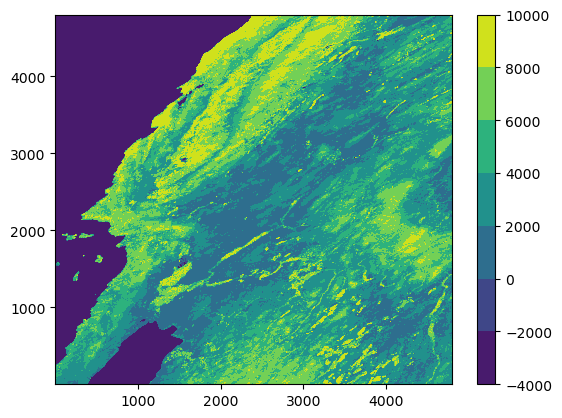

In [12]:
plt.contourf(NDVI_data, origin='upper')
plt.colorbar()